# Perceptual Distance vs Feature Distance

The usual imports:

In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from ast import literal_eval
from itertools import combinations

Loading the stimuli probabilities extracted and calculated from behavioral data, as well as the calculated feature distances between stimuli:

In [2]:
probabilities = pd.read_csv('stimuli_probabilities.csv')
feature_distance = pd.read_csv('stimuli_feature_distance.csv', index_col=0)

In [3]:
probabilities['stimuli'] = probabilities['stimuli'].apply(literal_eval)

In [4]:
feature_distance.head()

,70,119,6,56,118,103,102,110,51,98,...,122,126,127,131,133,136,137,139,140,142
stimulus,,,,,,,,,,,,,,,,,,,,,
70,0.000000,12.474607,14.710942,13.245094,12.371401,12.918498,11.958554,13.430166,12.949262,11.836654,...,13.774317,12.926530,7.117870,6.237304,12.508600,14.314662,11.666097,11.901443,12.155128,10.240167
119,12.474607,0.000000,7.347430,7.351617,6.671245,11.082668,4.561606,11.295092,10.821586,5.586102,...,7.529168,7.859074,8.038837,6.237304,6.517481,12.930942,5.647546,4.224088,8.537239,9.918832
6,14.710942,7.347430,0.000000,5.761759,11.310690,14.567134,9.076145,14.429674,14.426078,8.276055,...,12.380241,8.484698,12.221782,9.812967,10.312066,16.531130,9.960188,8.927435,12.357051,10.897982
56,13.245094,7.351617,5.761759,0.000000,9.050677,12.565252,7.944051,11.831288,12.460546,5.550132,...,9.681710,3.984486,10.201615,8.708354,6.837714,13.304253,8.069576,6.386328,9.998956,10.209425
118,12.371401,6.671245,11.310690,9.050677,0.000000,8.547679,4.458944,7.872903,8.186836,5.870663,...,6.646069,7.589858,6.813722,7.737866,5.215820,9.479585,4.620528,4.721606,5.084933,9.871111


In [5]:
probabilities.index = pd.MultiIndex.from_tuples(probabilities['stimuli'], names=['stimulus_1', 'stimulus_2'])
probabilities = probabilities.drop('stimuli', axis=1).unstack()
probabilities.columns = probabilities.columns.droplevel()

In [6]:
probabilities.head()

stimulus_2,1,2,3,4,5,6,7,8,9,10,...,135,136,137,138,139,140,141,142,143,144
stimulus_1,,,,,,,,,,,,,,,,,,,,,
1,0.83871,0.176471,NaN,NaN,0.166667,0.333333,0.142857,0.4,0.333333,NaN,...,NaN,0.166667,0.294118,NaN,NaN,0.857143,0.25,0.352941,0.238095,0.200000
2,NaN,0.776316,NaN,NaN,0.466667,0.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,0.133333,NaN,NaN,NaN,NaN,0.166667,0.473684,0.444444
3,NaN,NaN,0.832618,0.578125,NaN,NaN,0.294118,NaN,NaN,0.357143,...,0.488372,NaN,NaN,0.285714,0.500000,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.769648,NaN,NaN,0.232877,NaN,NaN,0.641026,...,0.272727,NaN,NaN,0.222222,0.269231,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,0.800000,0.312500,NaN,NaN,NaN,NaN,...,NaN,NaN,0.090909,NaN,NaN,NaN,NaN,0.500000,0.625000,0.100000


In [7]:
probabilities.loc[(70, 119)]

0.4444444444444444

In [8]:
feature_distance.columns = feature_distance.columns.astype('int64')

model = pd.DataFrame(columns=['stimuli', 'feature_distance', 'probability'])
for stim_pairs in combinations(feature_distance.index, 2):
    stim_pairs = tuple(sorted(stim_pairs))
    if not np.isnan(probabilities.loc[stim_pairs]):
        # print('---------------------------------------')
        # print('Stimuli: ', stim_pairs)
        # print('Feature Distance: ', feature_distance.loc[stim_pairs])
        # print('Probability: ', probabilities.loc[stim_pairs])
        model.loc[len(model.index)] = [stim_pairs, feature_distance.loc[stim_pairs], probabilities.loc[stim_pairs]]

In [9]:
model.head()

,stimuli,feature_distance,probability
0,"(70, 119)",12.474607,0.444444
1,"(6, 70)",14.710942,0.444444
2,"(70, 118)",12.371401,0.302326
3,"(70, 103)",12.918498,0.233333
4,"(70, 102)",11.958554,0.166667


In [10]:
sns.set_theme()

<AxesSubplot:xlabel='feature_distance', ylabel='probability'>

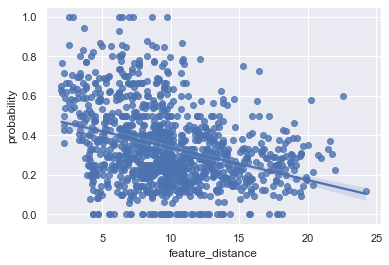

In [11]:
sns.regplot(x='feature_distance', y='probability', data=model)

In [14]:
def perceptual_distance(stimuli, probabilities):
    p_nogo_ab = 1 - probabilities.loc[stimuli]
    p_nogo_aa = 1 - probabilities.loc[(stimuli[0], stimuli[0])]
    p_nogo_bb = 1 - probabilities.loc[(stimuli[1], stimuli[1])]
    distance = 1 - ((1 - p_nogo_ab)/(math.sqrt((1 - p_nogo_aa) * (1 - p_nogo_bb))))
    return distance

In [15]:
model['perceptual_distance'] = model[['stimuli']].apply(lambda x: perceptual_distance(x['stimuli'], probabilities), axis=1)

In [16]:
model.head()

,stimuli,feature_distance,probability,perceptual_distance
0,"(70, 119)",12.474607,0.444444,0.439805
1,"(6, 70)",14.710942,0.444444,0.487326
2,"(70, 118)",12.371401,0.302326,0.614457
3,"(70, 103)",12.918498,0.233333,0.714042
4,"(70, 102)",11.958554,0.166667,0.790147


<AxesSubplot:xlabel='feature_distance', ylabel='perceptual_distance'>

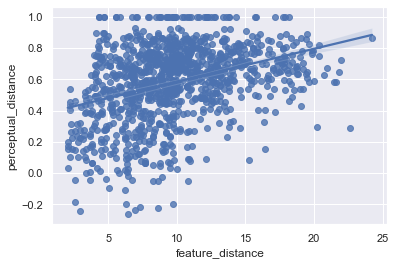

In [17]:
sns.regplot(x='feature_distance', y='perceptual_distance', data=model)